In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from plots import plots
from database import read_database

plt.rcParams['font.size'] = 16
# plt.rcParams['xtick.labelsize'] = 14

In [2]:
from importlib import reload
reload(plots);

In [3]:
output = Path('/data3/bolensadrien/output')
database = read_database(only_processed=True)
print([entry['name'] for entry in database[-5:]])

['225_deep_q_learning', '228_deep_q_learning', '229_deep_q_learning', '231_deep_q_learning', '230_deep_q_learning']


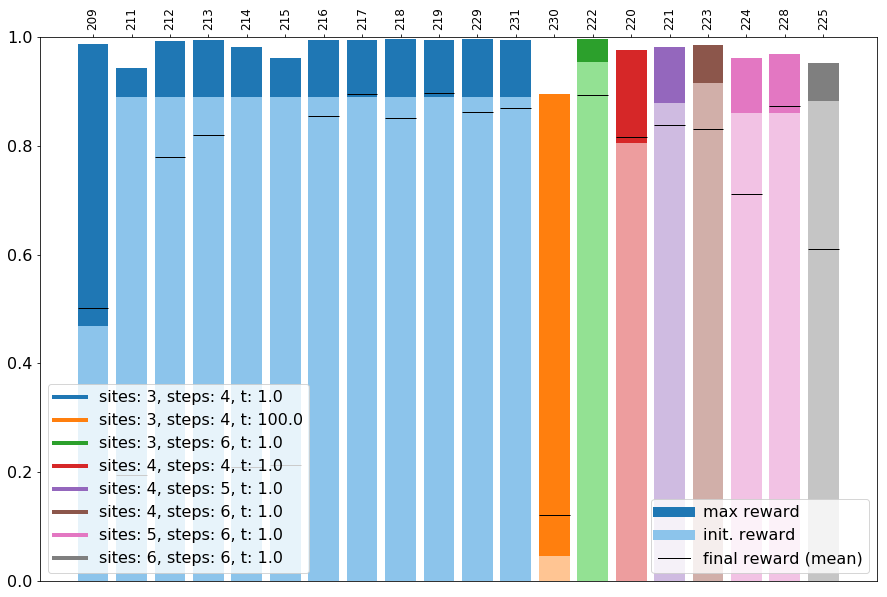

In [5]:
class_def = ['n_sites', 'n_steps', 'time_segment']
# , ('ham_params', 'alpha')]
param_filter = {'subclass': 'WithReplayMemory', ('ham_params', 'alpha'): 3.0}

paths_to_data = [output / entry['name'] for entry in database[-20:]]

fig, ax = plt.subplots(figsize=(15, 10))

# with plt.rc_context({'font.size': 15}):
# with plt.rc_context({'xtick.labelsize': 5, 'axes.labelsize': 5}):
plots.plot_comparison_of_rewards(paths_to_data, class_def, param_filter, ax=ax)
ax.tick_params(axis='x', labelsize=12) 

In [6]:
index = 230
path_to_data = output / (str(index) + '_deep_q_learning')

In [7]:
categories = ['main', 'q_learning', 'neural_network']
categories = 'all'
plots.plot_info(path_to_data, categories=categories, print_instead=True)

230_deep_q_learning, n_tasks=200/200

main: 
{'n_sites': 3,
 'n_steps': 4,
 'system_class': 'LongRangeIsing',
 'time_segment': 100.0}

ham_params: 
{'ham_params': {'J': 1.0, 'alpha': 3.0, 'g': 2.0, 'h': 2.0}}

q_learning: 
{'exploration': 'gaussian',
 'n_episodes': 100000,
 'n_replays': 10,
 'replay_spacing': 50}

neural_network: 
{'architecture': [[150, 'tanh'], [40, 'relu'], [1, 'sigmoid']],
 'capacity': 100,
 'model_update_spacing': 20,
 'sampling_size': 100,
 'subclass': 'WithReplayMemory'}

max_q_optimizer: 
{'max_q_optimizer': {'algorithm': 'NAG',
                     'convergence_threshold': 0.0005,
                     'learning_rate': 0.6,
                     'momentum': 0.9,
                     'n_initial_actions': 21,
                     'n_iterations': 6}}

other: 
{'NN_optimizer': 'SGD',
 'bc': 'open',
 'epsilon_decay': 0.9999411315398542,
 'epsilon_max': 1.0,
 'epsilon_min': 0.005,
 'initial_state': 'random_product_state',
 'lam': 0.8,
 'learning_rate': 0.618,
 'n_dire

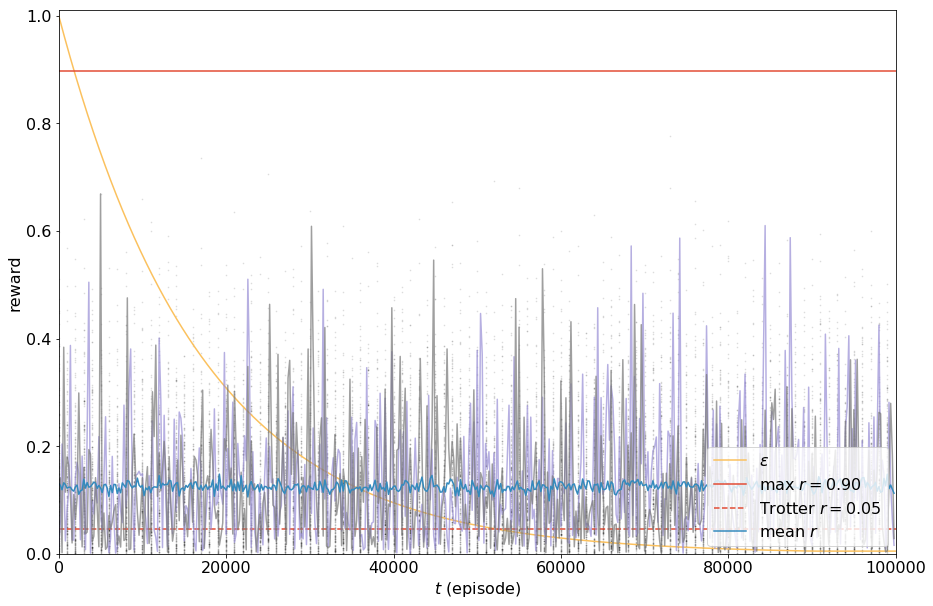

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))
plots.plot_rewards_vs_episodes(path_to_data, n_x=500, n_x_scatter=100,
                               scatter=True, n_individual_runs=2, n_slices=0, ax=ax)

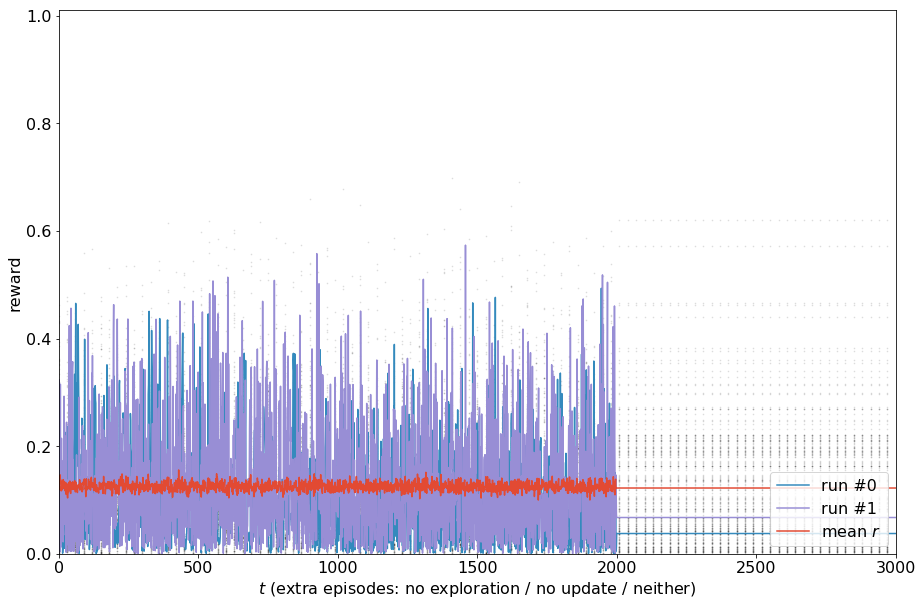

In [9]:
fig, ax = plt.subplots(figsize=(15, 10))
plots.plot_rewards_vs_extra_episodes(path_to_data, n_x=None, n_x_scatter=100, scatter=True, ax=ax)

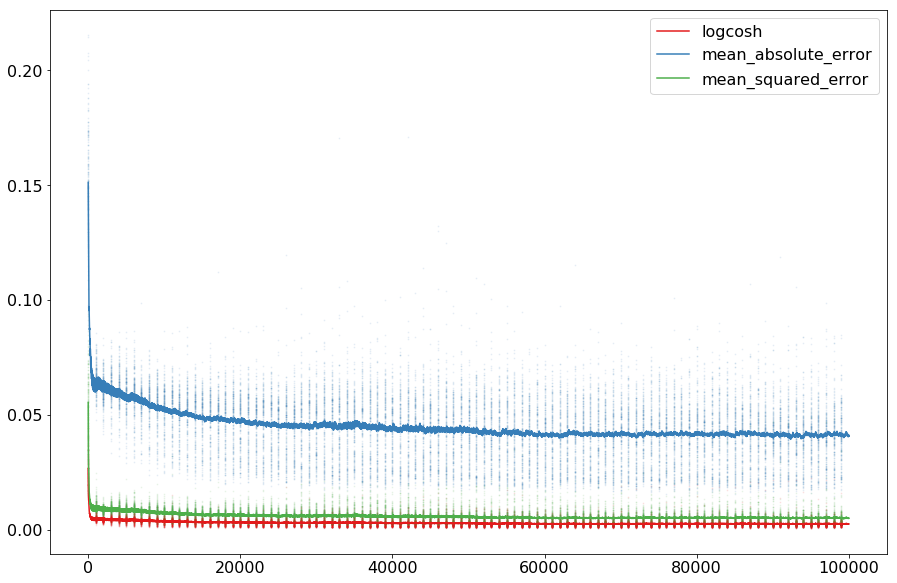

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))
plots.plot_network_metrics(path_to_data, n_x_scatter=100, scatter=True)

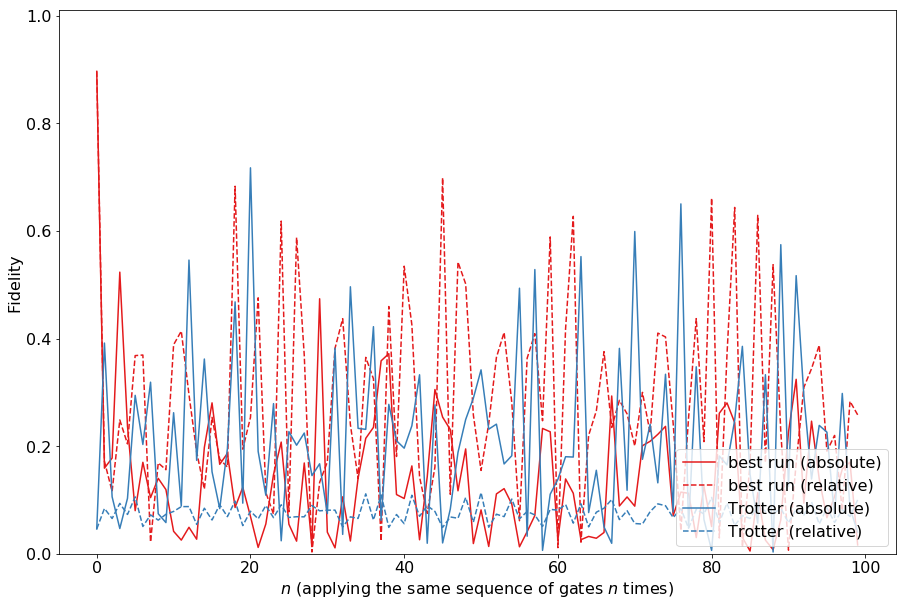

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
plots.plot_post_episode_rewards(path_to_data, ax=ax)

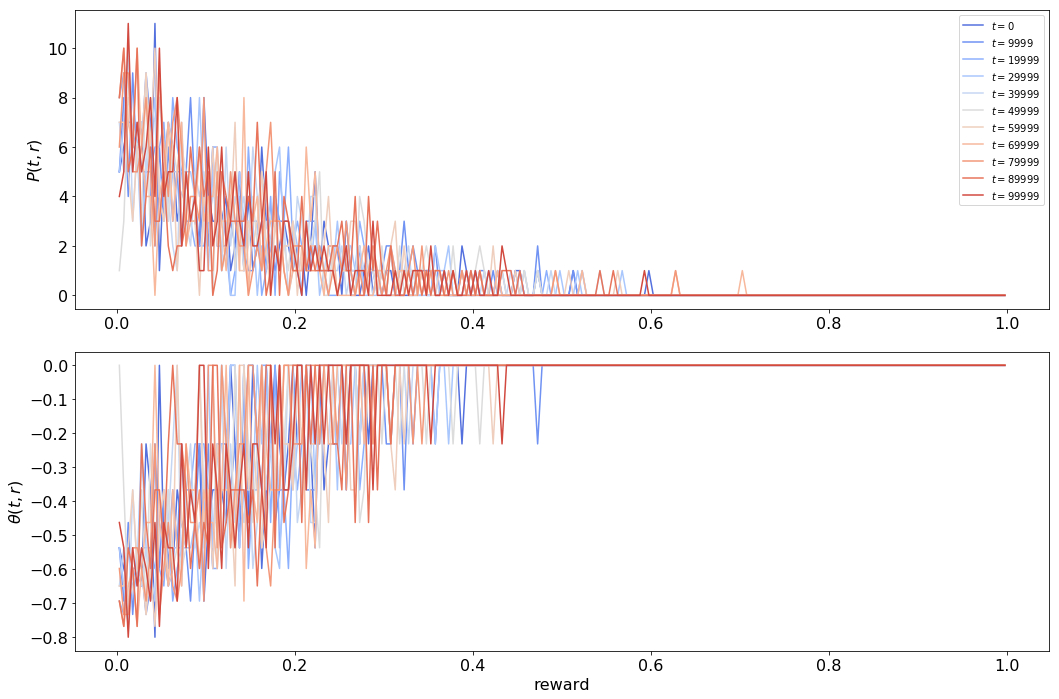

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

with plt.rc_context({'legend.fontsize': 10}):
    plots.plot_reward_distribution(path_to_data, n_bins=200, n_slices=11, with_theta=True, ax1=ax1, ax2=ax2)
    plt.tight_layout()